# Задачи

1) С помощью моделей прогнозирования предсказать определённые признаки на 90 дней вперёд

2) Подготовить датасет для предсказания спроса определения максимальной прибыли


- *Т.к. наилучшим образом построить прогноз по параметрам будет для каждого города по продукту, воспользуемся библиотекой fbprophet, которая даже без дополнительных параметров предсказывает достаточно хорошо на бейзлайне*

# Загрузка данных и библиотек

In [179]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from src.metrics.get_metrics import get_metrics_classification

import warnings

warnings.filterwarnings("ignore")

RAND = 10

In [247]:
df_weather = pd.read_csv('data/feature_forecasting/weather_df_done.csv',
                         parse_dates=['date'])
df_cost = pd.read_csv('data/feature_forecasting/df_cost_done.csv',
                      parse_dates=['date'])
df_competitors = pd.read_csv(
    'data/feature_forecasting/df_competitors_done.csv', parse_dates=['date'])

# Forecasting

## Cost

In [52]:
df_cost

,place,product,cost,date
0,Анор Лондо,Целебные травы,2.07,2216-01-02
1,Анор Лондо,Целебные травы,2.07,2216-01-03
2,Анор Лондо,Целебные травы,2.07,2216-01-04
3,Анор Лондо,Целебные травы,2.07,2216-01-05
4,Анор Лондо,Целебные травы,2.07,2216-01-06
...,...,...,...,...
14995,Фалькония,Эстус,3.26,2218-09-23
14996,Фалькония,Эстус,7.29,2218-09-24
14997,Фалькония,Эстус,7.29,2218-09-25
14998,Фалькония,Эстус,7.29,2218-09-26


In [254]:
df_cost_mean = df_cost.copy()

In [255]:
df_cost_mean = df_cost_mean.drop(columns=(['place', 'product']), axis=1)

In [256]:
df_cost_mean = df_cost_mean.groupby('date')['cost'].mean().reset_index()

In [257]:
df_cost_mean.columns = ['ds', 'y']

In [258]:
m = Prophet()
model = m.fit(df_cost_mean)

15:16:59 - cmdstanpy - INFO - Chain [1] start processing
15:16:59 - cmdstanpy - INFO - Chain [1] done processing


In [259]:
future = m.make_future_dataframe(periods=90, freq='D')
forecast = m.predict(future)

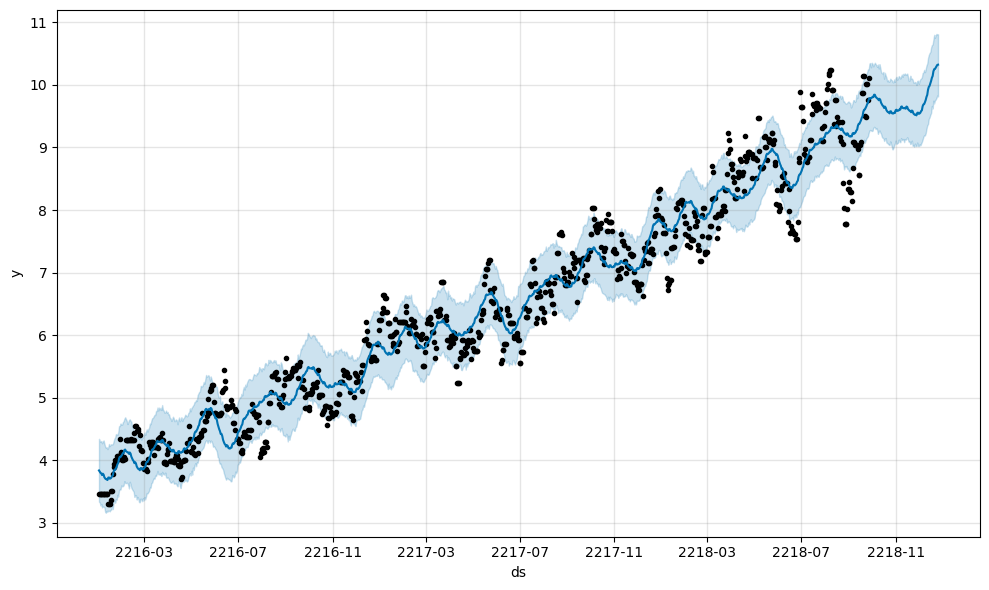

In [260]:
plot1 = m.plot(forecast)

In [261]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2216-01-02,3.670377,3.336746,4.343643,3.670377,3.670377,0.167691,0.167691,0.167691,-0.003921,-0.003921,-0.003921,0.171612,0.171612,0.171612,0.0,0.0,0.0,3.838068
1,2216-01-03,3.676065,3.326534,4.309459,3.676065,3.676065,0.142506,0.142506,0.142506,-0.009515,-0.009515,-0.009515,0.152022,0.152022,0.152022,0.0,0.0,0.0,3.818571
2,2216-01-04,3.681753,3.277223,4.293829,3.681753,3.681753,0.118089,0.118089,0.118089,-0.012812,-0.012812,-0.012812,0.130901,0.130901,0.130901,0.0,0.0,0.0,3.799842
3,2216-01-05,3.687440,3.303482,4.309525,3.687440,3.687440,0.103697,0.103697,0.103697,-0.005138,-0.005138,-0.005138,0.108835,0.108835,0.108835,0.0,0.0,0.0,3.791137
4,2216-01-06,3.693128,3.246338,4.272902,3.693128,3.693128,0.071226,0.071226,0.071226,-0.015197,-0.015197,-0.015197,0.086423,0.086423,0.086423,0.0,0.0,0.0,3.764354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,2218-12-22,10.082797,9.753097,10.751456,10.064056,10.099111,0.170353,0.170353,0.170353,-0.003921,-0.003921,-0.003921,0.174273,0.174273,0.174273,0.0,0.0,0.0,10.253150
1086,2218-12-23,10.089777,9.765598,10.795139,10.070660,10.106283,0.184158,0.184158,0.184158,-0.009515,-0.009515,-0.009515,0.193674,0.193674,0.193674,0.0,0.0,0.0,10.273935
1087,2218-12-24,10.096756,9.793013,10.813433,10.077248,10.113577,0.196216,0.196216,0.196216,-0.012812,-0.012812,-0.012812,0.209028,0.209028,0.209028,0.0,0.0,0.0,10.292972
1088,2218-12-25,10.103736,9.829531,10.806310,10.083841,10.120833,0.215037,0.215037,0.215037,-0.005138,-0.005138,-0.005138,0.220175,0.220175,0.220175,0.0,0.0,0.0,10.318773


In [262]:
df_cv = cross_validation(m,
                         initial='275 days',
                         period='90 days',
                         horizon='90 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/8 [00:00<?, ?it/s]

15:17:03 - cmdstanpy - INFO - Chain [1] start processing
15:17:03 - cmdstanpy - INFO - Chain [1] done processing
15:17:03 - cmdstanpy - INFO - Chain [1] start processing
15:17:03 - cmdstanpy - INFO - Chain [1] done processing
15:17:03 - cmdstanpy - INFO - Chain [1] start processing
15:17:03 - cmdstanpy - INFO - Chain [1] done processing
15:17:04 - cmdstanpy - INFO - Chain [1] start processing
15:17:04 - cmdstanpy - INFO - Chain [1] done processing
15:17:04 - cmdstanpy - INFO - Chain [1] start processing
15:17:04 - cmdstanpy - INFO - Chain [1] done processing
15:17:04 - cmdstanpy - INFO - Chain [1] start processing
15:17:04 - cmdstanpy - INFO - Chain [1] done processing
15:17:05 - cmdstanpy - INFO - Chain [1] start processing
15:17:05 - cmdstanpy - INFO - Chain [1] done processing
15:17:05 - cmdstanpy - INFO - Chain [1] start processing
15:17:05 - cmdstanpy - INFO - Chain [1] done processing


In [263]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,0.508095,0.712808,0.607497,0.086213,0.080081,0.086170,0.208333
1,10 days,0.548397,0.740539,0.638681,0.093082,0.085101,0.092068,0.180556
2,11 days,0.623998,0.789936,0.671467,0.100474,0.086094,0.098002,0.180556
3,12 days,0.713108,0.844457,0.706869,0.108275,0.086753,0.104240,0.194444
4,13 days,0.837494,0.915147,0.752679,0.117327,0.088308,0.111725,0.194444
...,...,...,...,...,...,...,...,...
77,86 days,0.379845,0.616315,0.513202,0.074463,0.069679,0.073648,0.402778
78,87 days,0.408533,0.639166,0.527430,0.076200,0.072538,0.075550,0.416667
79,88 days,0.433935,0.658738,0.542974,0.077415,0.072538,0.077131,0.402778
80,89 days,0.475679,0.689695,0.568548,0.079711,0.072538,0.080015,0.375000


- *Как видно на таблице ошибок и по графику, даже на средних по всем городам и продуктам, данная модель очень неплохо справилась с предсказанием, при этом она указывает доверительный интервал на прогнозе*
- *Далее спрогнозируем всё по каждой группе и каждому продукту и оьъединим в один датафрейм*

In [264]:
grouped = df_cost.groupby(['place', 'product'])
result_df = pd.DataFrame()

for (place, product), group in grouped:
    m = Prophet()
    group = group.drop(columns=(['place', 'product']), axis=1)
    group.columns = ['y', 'ds']
    model = m.fit(group)
    future = m.make_future_dataframe(periods=90, freq='D')
    forecast = m.predict(future)
    forecast['place'] = f'{place}'
    forecast['product'] = f'{product}'
    result_df = pd.concat([result_df, forecast.iloc[-90:, :]],
                          ignore_index=True)

cost_forecast_df = result_df[['place', 'product', 'ds', 'yhat']]
cost_forecast_df

15:17:06 - cmdstanpy - INFO - Chain [1] start processing
15:17:06 - cmdstanpy - INFO - Chain [1] done processing
15:17:06 - cmdstanpy - INFO - Chain [1] start processing
15:17:06 - cmdstanpy - INFO - Chain [1] done processing
15:17:07 - cmdstanpy - INFO - Chain [1] start processing
15:17:07 - cmdstanpy - INFO - Chain [1] done processing
15:17:07 - cmdstanpy - INFO - Chain [1] start processing
15:17:08 - cmdstanpy - INFO - Chain [1] done processing
15:17:08 - cmdstanpy - INFO - Chain [1] start processing
15:17:08 - cmdstanpy - INFO - Chain [1] done processing
15:17:09 - cmdstanpy - INFO - Chain [1] start processing
15:17:09 - cmdstanpy - INFO - Chain [1] done processing
15:17:09 - cmdstanpy - INFO - Chain [1] start processing
15:17:09 - cmdstanpy - INFO - Chain [1] done processing
15:17:10 - cmdstanpy - INFO - Chain [1] start processing
15:17:10 - cmdstanpy - INFO - Chain [1] done processing
15:17:11 - cmdstanpy - INFO - Chain [1] start processing
15:17:11 - cmdstanpy - INFO - Chain [1]

,place,product,ds,yhat
0,Анор Лондо,Целебные травы,2218-09-28,6.950551
1,Анор Лондо,Целебные травы,2218-09-29,6.945553
2,Анор Лондо,Целебные травы,2218-09-30,6.926053
3,Анор Лондо,Целебные травы,2218-10-01,6.902003
4,Анор Лондо,Целебные травы,2218-10-02,6.955854
...,...,...,...,...
1345,Фалькония,Эстус,2218-12-22,5.309055
1346,Фалькония,Эстус,2218-12-23,5.264601
1347,Фалькония,Эстус,2218-12-24,5.285202
1348,Фалькония,Эстус,2218-12-25,5.280859


In [265]:
cost_forecast_df = cost_forecast_df.rename(columns={
    'ds': 'date',
    'yhat': 'cost'
})

In [266]:
cost_forecast_df

,place,product,date,cost
0,Анор Лондо,Целебные травы,2218-09-28,6.950551
1,Анор Лондо,Целебные травы,2218-09-29,6.945553
2,Анор Лондо,Целебные травы,2218-09-30,6.926053
3,Анор Лондо,Целебные травы,2218-10-01,6.902003
4,Анор Лондо,Целебные травы,2218-10-02,6.955854
...,...,...,...,...
1345,Фалькония,Эстус,2218-12-22,5.309055
1346,Фалькония,Эстус,2218-12-23,5.264601
1347,Фалькония,Эстус,2218-12-24,5.285202
1348,Фалькония,Эстус,2218-12-25,5.280859


## Competitors mean price

In [68]:
df_competitors

,place,product,date,competitors_mean_price
0,Анор Лондо,Целебные травы,2216-01-02,4.21
1,Анор Лондо,Целебные травы,2216-01-03,4.05
2,Анор Лондо,Целебные травы,2216-01-04,3.98
3,Анор Лондо,Целебные травы,2216-01-05,3.90
4,Анор Лондо,Целебные травы,2216-01-06,3.98
...,...,...,...,...
14995,Фалькония,Эстус,2218-09-23,14.69
14996,Фалькония,Эстус,2218-09-24,15.02
14997,Фалькония,Эстус,2218-09-25,14.76
14998,Фалькония,Эстус,2218-09-26,14.84


In [69]:
df_competitors_mean = df_competitors.copy()

In [70]:
df_competitors_mean = df_competitors_mean.drop(columns=(['place', 'product']),
                                               axis=1)

In [72]:
df_competitors_mean = df_competitors_mean.groupby(
    'date')['competitors_mean_price'].mean().reset_index()

In [73]:
df_competitors_mean.columns = ['ds', 'y']

In [74]:
m = Prophet()
model = m.fit(df_cost_mean)

12:26:08 - cmdstanpy - INFO - Chain [1] start processing
12:26:08 - cmdstanpy - INFO - Chain [1] done processing


In [75]:
future = m.make_future_dataframe(periods=90, freq='D')
forecast = m.predict(future)

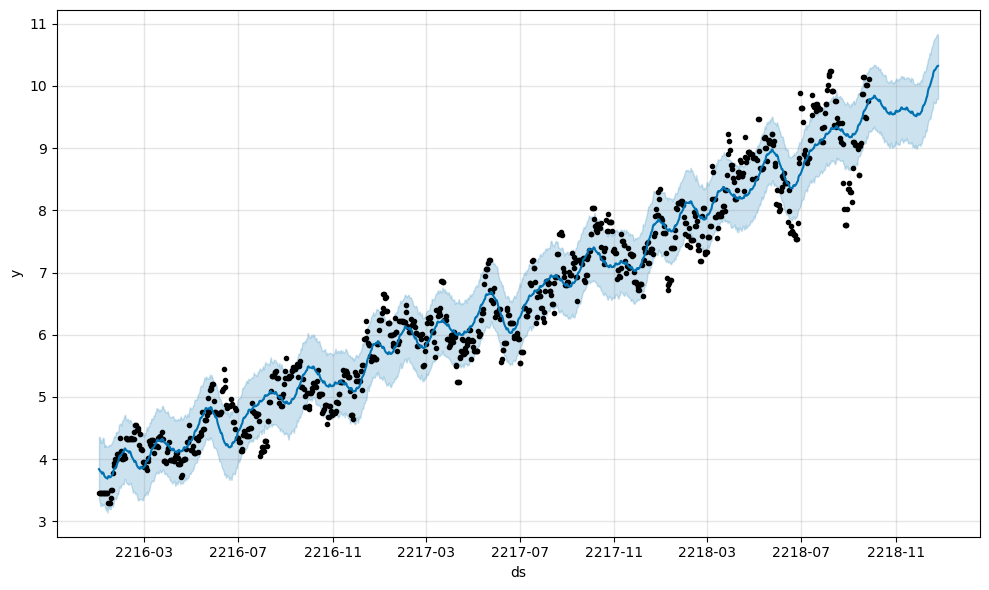

In [76]:
plot1 = m.plot(forecast)

In [77]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2216-01-02,3.670377,3.346824,4.360401,3.670377,3.670377,0.167691,0.167691,0.167691,-0.003921,-0.003921,-0.003921,0.171612,0.171612,0.171612,0.0,0.0,0.0,3.838068
1,2216-01-03,3.676065,3.308589,4.352749,3.676065,3.676065,0.142506,0.142506,0.142506,-0.009515,-0.009515,-0.009515,0.152022,0.152022,0.152022,0.0,0.0,0.0,3.818571
2,2216-01-04,3.681753,3.242911,4.265976,3.681753,3.681753,0.118089,0.118089,0.118089,-0.012812,-0.012812,-0.012812,0.130901,0.130901,0.130901,0.0,0.0,0.0,3.799842
3,2216-01-05,3.687440,3.290586,4.315773,3.687440,3.687440,0.103697,0.103697,0.103697,-0.005138,-0.005138,-0.005138,0.108835,0.108835,0.108835,0.0,0.0,0.0,3.791137
4,2216-01-06,3.693128,3.246066,4.254916,3.693128,3.693128,0.071226,0.071226,0.071226,-0.015197,-0.015197,-0.015197,0.086423,0.086423,0.086423,0.0,0.0,0.0,3.764354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,2218-12-22,10.082797,9.717838,10.768280,10.062474,10.100061,0.170353,0.170353,0.170353,-0.003921,-0.003921,-0.003921,0.174273,0.174273,0.174273,0.0,0.0,0.0,10.253150
1086,2218-12-23,10.089777,9.724230,10.776703,10.069029,10.107314,0.184158,0.184158,0.184158,-0.009515,-0.009515,-0.009515,0.193674,0.193674,0.193674,0.0,0.0,0.0,10.273935
1087,2218-12-24,10.096756,9.787965,10.811352,10.075567,10.114607,0.196216,0.196216,0.196216,-0.012812,-0.012812,-0.012812,0.209028,0.209028,0.209028,0.0,0.0,0.0,10.292972
1088,2218-12-25,10.103736,9.789061,10.835756,10.082100,10.122092,0.215037,0.215037,0.215037,-0.005138,-0.005138,-0.005138,0.220175,0.220175,0.220175,0.0,0.0,0.0,10.318773


In [78]:
df_cv = cross_validation(m,
                         initial='275 days',
                         period='90 days',
                         horizon='90 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/8 [00:00<?, ?it/s]

12:26:18 - cmdstanpy - INFO - Chain [1] start processing
12:26:18 - cmdstanpy - INFO - Chain [1] done processing
12:26:18 - cmdstanpy - INFO - Chain [1] start processing
12:26:18 - cmdstanpy - INFO - Chain [1] done processing
12:26:18 - cmdstanpy - INFO - Chain [1] start processing
12:26:19 - cmdstanpy - INFO - Chain [1] done processing
12:26:19 - cmdstanpy - INFO - Chain [1] start processing
12:26:19 - cmdstanpy - INFO - Chain [1] done processing
12:26:19 - cmdstanpy - INFO - Chain [1] start processing
12:26:19 - cmdstanpy - INFO - Chain [1] done processing
12:26:20 - cmdstanpy - INFO - Chain [1] start processing
12:26:20 - cmdstanpy - INFO - Chain [1] done processing
12:26:20 - cmdstanpy - INFO - Chain [1] start processing
12:26:20 - cmdstanpy - INFO - Chain [1] done processing
12:26:20 - cmdstanpy - INFO - Chain [1] start processing
12:26:20 - cmdstanpy - INFO - Chain [1] done processing


In [79]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,0.508095,0.712808,0.607497,0.086213,0.080081,0.086170,0.208333
1,10 days,0.548397,0.740539,0.638681,0.093082,0.085101,0.092068,0.180556
2,11 days,0.623998,0.789936,0.671467,0.100474,0.086094,0.098002,0.180556
3,12 days,0.713108,0.844457,0.706869,0.108275,0.086753,0.104240,0.194444
4,13 days,0.837494,0.915147,0.752679,0.117327,0.088308,0.111725,0.194444
...,...,...,...,...,...,...,...,...
77,86 days,0.379845,0.616315,0.513202,0.074463,0.069679,0.073648,0.402778
78,87 days,0.408533,0.639166,0.527430,0.076200,0.072538,0.075550,0.416667
79,88 days,0.433935,0.658738,0.542974,0.077415,0.072538,0.077131,0.402778
80,89 days,0.475679,0.689695,0.568548,0.079711,0.072538,0.080015,0.375000


- *Судя по ошибкам модель снова очень неплохо справилась*
- *Далее спрогнозируем всё по каждой группе и каждому продукту и оьъединим в один датафрейм*

In [88]:
grouped = df_competitors.groupby(['place', 'product'])
result_df = pd.DataFrame()

for (place, product), group in grouped:
    m = Prophet()
    group = group.drop(columns=(['place', 'product']), axis=1)
    group.columns = ['ds', 'y']
    model = m.fit(group)
    future = m.make_future_dataframe(periods=90, freq='D')
    forecast = m.predict(future)
    forecast['place'] = f'{place}'
    forecast['product'] = f'{product}'
    result_df = pd.concat([result_df, forecast.iloc[-90:, :]],
                          ignore_index=True)

competitors_forecast_df = result_df[['place', 'product', 'ds', 'yhat']]
competitors_forecast_df

12:30:59 - cmdstanpy - INFO - Chain [1] start processing
12:30:59 - cmdstanpy - INFO - Chain [1] done processing
12:30:59 - cmdstanpy - INFO - Chain [1] start processing
12:30:59 - cmdstanpy - INFO - Chain [1] done processing
12:31:00 - cmdstanpy - INFO - Chain [1] start processing
12:31:00 - cmdstanpy - INFO - Chain [1] done processing
12:31:01 - cmdstanpy - INFO - Chain [1] start processing
12:31:01 - cmdstanpy - INFO - Chain [1] done processing
12:31:01 - cmdstanpy - INFO - Chain [1] start processing
12:31:01 - cmdstanpy - INFO - Chain [1] done processing
12:31:02 - cmdstanpy - INFO - Chain [1] start processing
12:31:02 - cmdstanpy - INFO - Chain [1] done processing
12:31:02 - cmdstanpy - INFO - Chain [1] start processing
12:31:02 - cmdstanpy - INFO - Chain [1] done processing
12:31:03 - cmdstanpy - INFO - Chain [1] start processing
12:31:03 - cmdstanpy - INFO - Chain [1] done processing
12:31:04 - cmdstanpy - INFO - Chain [1] start processing
12:31:04 - cmdstanpy - INFO - Chain [1]

,place,product,ds,yhat
0,Анор Лондо,Целебные травы,2218-09-28,9.764069
1,Анор Лондо,Целебные травы,2218-09-29,9.796939
2,Анор Лондо,Целебные травы,2218-09-30,9.648104
3,Анор Лондо,Целебные травы,2218-10-01,9.573142
4,Анор Лондо,Целебные травы,2218-10-02,9.638593
...,...,...,...,...
1345,Фалькония,Эстус,2218-12-22,15.655683
1346,Фалькония,Эстус,2218-12-23,15.582679
1347,Фалькония,Эстус,2218-12-24,15.597812
1348,Фалькония,Эстус,2218-12-25,15.655546


In [89]:
competitors_forecast_df = cost_forecast_df.rename(
    columns={
        'ds': 'date',
        'yhat': 'competitors_mean_price'
    })

In [90]:
competitors_forecast_df

,place,product,date,competitors_mean_price
0,Анор Лондо,Целебные травы,2218-09-28,9.764069
1,Анор Лондо,Целебные травы,2218-09-29,9.796939
2,Анор Лондо,Целебные травы,2218-09-30,9.648104
3,Анор Лондо,Целебные травы,2218-10-01,9.573142
4,Анор Лондо,Целебные травы,2218-10-02,9.638593
...,...,...,...,...
1345,Фалькония,Эстус,2218-12-22,15.655683
1346,Фалькония,Эстус,2218-12-23,15.582679
1347,Фалькония,Эстус,2218-12-24,15.597812
1348,Фалькония,Эстус,2218-12-25,15.655546


## Weather

- *Стоит посмотреть как представлены погодные признаки за тот же трёхмесячный период в прошлом*

In [203]:
df_weather

,place,hot,rain,snow,date
0,Фалькония,0,0,0,2216-01-02
1,Анор Лондо,1,0,0,2216-01-02
2,Врата Балдура,0,0,1,2216-01-02
3,Нокрон,0,0,0,2216-01-02
4,Кеджистан,0,0,1,2216-01-02
...,...,...,...,...,...
4995,Фалькония,0,0,0,2218-09-27
4996,Анор Лондо,0,0,1,2218-09-27
4997,Врата Балдура,1,0,0,2218-09-27
4998,Нокрон,0,0,0,2218-09-27


- Посмотрим на примере Анор Лондо

In [103]:
start_date = '2217-09-28'
end_date = '2217-12-26'

In [104]:
df_weather[(df_weather['place'] == 'Анор Лондо')
           & (df_weather['date'] >= '2217-09-28') &
           (df_weather['date'] <= '2217-12-26')]

,place,hot,rain,snow,date
3176,Анор Лондо,0,0,0,2217-09-28
3181,Анор Лондо,1,0,0,2217-09-29
3186,Анор Лондо,0,0,0,2217-09-30
3191,Анор Лондо,0,1,0,2217-10-01
3196,Анор Лондо,0,0,0,2217-10-02
...,...,...,...,...,...
3601,Анор Лондо,0,0,0,2217-12-22
3606,Анор Лондо,1,0,0,2217-12-23
3611,Анор Лондо,0,0,0,2217-12-24
3616,Анор Лондо,0,0,1,2217-12-25


In [105]:
selected_data = df_weather[(df_weather['place'] == 'Анор Лондо')
                           & (df_weather['date'] >= start_date) &
                           (df_weather['date'] <= end_date)]

binary_counts = selected_data[['hot', 'rain', 'snow']].sum()

print(binary_counts)

hot     16
rain    15
snow    12
dtype: int64


In [106]:
start_date = '2216-09-28'
end_date = '2216-12-26'

In [107]:
df_weather[(df_weather['place'] == 'Анор Лондо')
           & (df_weather['date'] >= start_date) &
           (df_weather['date'] <= end_date)]

,place,hot,rain,snow,date
1351,Анор Лондо,0,0,0,2216-09-28
1356,Анор Лондо,0,0,0,2216-09-29
1361,Анор Лондо,0,0,0,2216-09-30
1366,Анор Лондо,0,0,0,2216-10-01
1371,Анор Лондо,0,0,0,2216-10-02
...,...,...,...,...,...
1776,Анор Лондо,0,0,0,2216-12-22
1781,Анор Лондо,0,0,0,2216-12-23
1786,Анор Лондо,0,1,0,2216-12-24
1791,Анор Лондо,0,0,0,2216-12-25


In [108]:
selected_data = df_weather[(df_weather['place'] == 'Анор Лондо')
                           & (df_weather['date'] >= start_date) &
                           (df_weather['date'] <= end_date)]

binary_counts = selected_data[['hot', 'rain', 'snow']].sum()

print(binary_counts)

hot      9
rain    19
snow    10
dtype: int64


- Данные не повторяются и количество погодных явлений хоть и примерно близко, но не одинаково

- Попробуем предсказать классифицировать дождь по временным данным, стоит обращать внимание на Accuracy и Recall, чтобы минимизировать количество ложных пропусков (ложных отрицательных предсказаний) относительно дождливых дней.

In [204]:
df_weather['month_name'] = df_weather['date'].dt.month_name()
df_weather['season'] = pd.to_datetime(df_weather['date']).dt.month.map({
    1:
    'Winter',
    2:
    'Winter',
    3:
    'Spring',
    4:
    'Spring',
    5:
    'Spring',
    6:
    'Summer',
    7:
    'Summer',
    8:
    'Summer',
    9:
    'Fall',
    10:
    'Fall',
    11:
    'Fall',
    12:
    'Winter'
})

In [205]:
df_weather

,place,hot,rain,snow,date,month_name,season
0,Фалькония,0,0,0,2216-01-02,January,Winter
1,Анор Лондо,1,0,0,2216-01-02,January,Winter
2,Врата Балдура,0,0,1,2216-01-02,January,Winter
3,Нокрон,0,0,0,2216-01-02,January,Winter
4,Кеджистан,0,0,1,2216-01-02,January,Winter
...,...,...,...,...,...,...,...
4995,Фалькония,0,0,0,2218-09-27,September,Fall
4996,Анор Лондо,0,0,1,2218-09-27,September,Fall
4997,Врата Балдура,1,0,0,2218-09-27,September,Fall
4998,Нокрон,0,0,0,2218-09-27,September,Fall


In [206]:
df_weather_label = pd.get_dummies(df_weather)

In [207]:
df_weather_label

,hot,rain,snow,date,place_Анор Лондо,place_Врата Балдура,place_Кеджистан,place_Нокрон,place_Фалькония,month_name_April,...,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September,season_Fall,season_Spring,season_Summer,season_Winter
0,0,0,0,2216-01-02,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,1,0,0,2216-01-02,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0,0,1,2216-01-02,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,2216-01-02,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0,0,1,2216-01-02,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,2218-09-27,False,False,False,False,True,False,...,False,False,False,False,False,True,True,False,False,False
4996,0,0,1,2218-09-27,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4997,1,0,0,2218-09-27,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4998,0,0,0,2218-09-27,False,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False


In [208]:
X = df_weather_label.drop(columns=['date', 'rain'], axis=1)
y = df_weather_label['rain']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=RAND)

In [209]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [210]:
# Предсказать вероятности для тестового набора
probabilities = model.predict_proba(X_test)[:, 1]

# Установить порог
threshold = 0.24
binary_predictions = (probabilities > threshold).astype(int)

In [213]:
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)

metrics = get_metrics_classification(y_test,
                                     binary_predictions,
                                     y_score,
                                     name='Baseline')
metrics

,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,Baseline,0.583,0.699345,0.259843,0.763006,0.387665,0.379991


In [214]:
cls_rf = RandomForestClassifier(random_state=RAND)
cls_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [215]:
y_pred_cls_rf = cls_rf.predict(X_test)
y_score_cls_rf = cls_rf.predict_proba(X_test)

In [239]:
threshold = 0.24
probabilities = cls_rf.predict_proba(X_test)[:, 1]
binary_predictions = (probabilities > threshold).astype(int)

In [240]:
metrics = get_metrics_classification(y_test,
                                     binary_predictions,
                                     y_score_cls_rf,
                                     name='RandomForest_Baseline')

In [241]:
metrics

,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,RandomForest_Baseline,0.628,0.710472,0.269142,0.67052,0.384106,0.383692


- Бейзланы моделей достаточно плохо предсказывают (даже при условии уменьшения threshold, без его определения справляются ещё хуже) условие будет дождь или нет, поэтому стоит остановится на исторических данных, т.к. с предсказанием каждого погодного условия шанс ошибиться слишком велик. Видимо в этом мире погодные условия особо не зависят от времени именно поэтому моделям тяжело с этим справляться. Скорее всего для прогнозирования погоды на исторических данных их нужно больше.

- Возьмём исторические данные о погоде за последний год за тот же период и предположим, что в 2218 погодные условия будут так же распределены. В любом случае для сравнения прогнозной прибыли прогнозные признаки будут одинаковы.

In [248]:
df_weather = df_weather[(df_weather['date'] >= '2217-09-28')
                        & (df_weather['date'] <= '2217-12-26')]

In [249]:
df_weather['date'] = df_weather['date'] + pd.DateOffset(years=1)
weather_forecast_df = df_weather[['place', 'hot', 'rain', 'snow', 'date']]
weather_forecast_df

,place,hot,rain,snow,date
3175,Фалькония,0,0,0,2218-09-28
3176,Анор Лондо,0,0,0,2218-09-28
3177,Врата Балдура,1,0,0,2218-09-28
3178,Нокрон,1,0,0,2218-09-28
3179,Кеджистан,1,0,0,2218-09-28
...,...,...,...,...,...
3620,Фалькония,0,0,0,2218-12-26
3621,Анор Лондо,0,0,0,2218-12-26
3622,Врата Балдура,1,0,0,2218-12-26
3623,Нокрон,0,0,1,2218-12-26


# Merging

In [267]:
# Объединяем датасеты
merged_forecast_df = pd.merge(cost_forecast_df,
                              competitors_forecast_df,
                              on=['place', 'product', 'date'],
                              how='left')
merged_forecast_df = pd.merge(merged_forecast_df,
                              weather_forecast_df,
                              on=['place', 'date'],
                              how='left')

In [268]:
merged_forecast_df

,place,product,date,cost,competitors_mean_price,hot,rain,snow
0,Анор Лондо,Целебные травы,2218-09-28,6.950551,9.764069,0,0,0
1,Анор Лондо,Целебные травы,2218-09-29,6.945553,9.796939,1,0,0
2,Анор Лондо,Целебные травы,2218-09-30,6.926053,9.648104,0,0,0
3,Анор Лондо,Целебные травы,2218-10-01,6.902003,9.573142,0,1,0
4,Анор Лондо,Целебные травы,2218-10-02,6.955854,9.638593,0,0,0
...,...,...,...,...,...,...,...,...
1345,Фалькония,Эстус,2218-12-22,5.309055,15.655683,0,0,0
1346,Фалькония,Эстус,2218-12-23,5.264601,15.582679,0,0,0
1347,Фалькония,Эстус,2218-12-24,5.285202,15.597812,0,0,0
1348,Фалькония,Эстус,2218-12-25,5.280859,15.655546,0,0,1


In [270]:
merged_forecast_df.to_csv('data/price_forecasting/merged_forecast_df.csv',
                          index=False)